## 타이타닉 예제

- 패키지 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- 데이터 로딩 및 확인

In [2]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 결측치 처리

In [4]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
titanic.Cabin.fillna('UNK', inplace=True)
titanic.Embarked.fillna('UNK', inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

- 범주형 변수 처리

In [5]:
titanic.Cabin.value_counts()

UNK            687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
              ... 
A14              1
B82 B84          1
D45              1
E63              1
B79              1
Name: Cabin, Length: 148, dtype: int64

In [6]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
titanic.Cabin.value_counts()

UNK            687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
              ... 
A14              1
B82 B84          1
D45              1
E63              1
B79              1
Name: Cabin, Length: 148, dtype: int64

In [8]:
titanic.Embarked.value_counts()

S      644
C      168
Q       77
UNK      2
Name: Embarked, dtype: int64

In [9]:
titanic.Cabin = titanic.Cabin.str[:1]
titanic.Cabin.value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

- 필요 없는 열의 제거

In [10]:
col = ['PassengerId', 'Name', 'Ticket']
titanic = titanic.drop(col, axis='columns')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,U,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,U,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,U,S


- 데이터 탐색

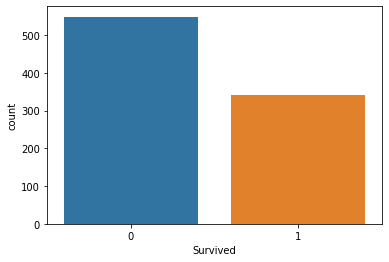

In [11]:
sns.countplot(titanic.Survived);

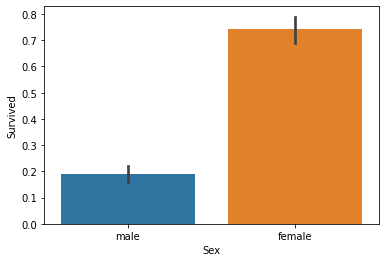

In [12]:
sns.barplot(x='Sex', y='Survived', data=titanic);

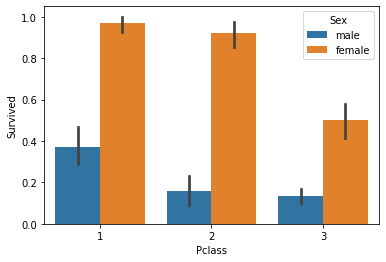

In [13]:
sns.barplot(x='Pclass', y='Survived', data=titanic, hue='Sex');

- 범주형 변수의 수치 변경

In [14]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Cabin','Embarked']
for col in cols:
    le= LabelEncoder()
    titanic[col] = le.fit_transform(titanic[col])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,8,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,8,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,8,2


- 초기 Baseline 테스트를 위해 모형집합 생성

In [15]:
y = titanic.Survived
x = titanic.drop('Survived', axis='columns')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

- Baseline 모델 생성 및 정확도 확인

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=1234)

dt.fit(x_train, y_train)
pred = dt.predict(x_test)
accuracy_score(y_test, pred)

0.770949720670391

- GridSearch

In [17]:
from sklearn.model_selection import GridSearchCV
param = {'max_depth': [2,3,5,10],
         'min_samples_leaf':[1,5,8]}

grid_dt = GridSearchCV(dt, param_grid=param, scoring='accuracy', cv=5)
grid_dt.fit(x_train, y_train)

print('최적 파라미터: ', grid_dt.best_params_)
print('최고 정확도: ', grid_dt.best_score_)
best_grid = grid_dt.best_estimator_
pred = best_grid.predict(x_test)
accuracy_score(y_test, pred)

최적 파라미터:  {'max_depth': 10, 'min_samples_leaf': 5}
최고 정확도:  0.800561797752809


0.8044692737430168

- 모델 학습 결과를 향후 활용하기 위해 피클형태로 저장

In [18]:
import joblib
with open('data/titanic.pkl','wb') as f:
    joblib.dump({'titanic':titanic, 'best_grid': best_grid}, f)